<a href="https://colab.research.google.com/github/rostro36/Partisan-Responses/blob/master/Knowledge_Graph_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Partisan-Responses-master')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Install all requirements.

In [ ]:
#!pip install -r requirements.txt
!pip install torchtext -U
!pip install spacy==2.1.0
!pip install neuralcoref allennlp hnswlib allennlp-models
!python -m spacy download en
!pip install wandb

     |████████████████████████████████| 481kB 10.8MB/s 
     |████████████████████████████████| 133kB 52.2MB/s 
     |████████████████████████████████| 6.3MB 35.5MB/s 
     |████████████████████████████████| 829kB 49.8MB/s 
     |████████████████████████████████| 92kB 11.1MB/s 
     |████████████████████████████████| 266kB 52.8MB/s 
     |████████████████████████████████| 1.4MB 39.9MB/s 
     |████████████████████████████████| 14.6MB 138kB/s 
     |████████████████████████████████| 296kB 54.0MB/s 
     |████████████████████████████████| 256kB 53.8MB/s 
     |████████████████████████████████| 512kB 47.2MB/s 
     |████████████████████████████████| 665kB 39.7MB/s 
     |████████████████████████████████| 71kB 10.0MB/s 
     |████████████████████████████████| 890kB 53.6MB/s 
     |████████████████████████████████| 6.9MB 55.4MB/s 
     |████████████████████████████████| 1.1MB 57.1MB/s 
     |████████████████████████████████| 204kB 54.6MB/s 
     |████████████████████████████████| 3.8MB 53.7

     |████████████████████████████████| 71kB 6.7MB/s 
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1
     |████████████████████████████████| 27.7MB 111kB/s 
     |████████████████████████████████| 92kB 12.5MB/s 
     |████████████████████████████████| 2.1MB 45.6MB/s 
     |████████████████████████████████| 3.2MB 41.8MB/s 
ERROR: en-core-web-sm 2.2.5 has requirement spacy>=2.2.2, but you'll have spacy 2.1.0 which is incompatible.
  Found existing installation: preshed 3.0.2
    Uninstalling preshed-3.0.2:
      Successfully uninstalled preshed-3.0.2
  Found existing installation: plac 1.1.3
    Uninstalling plac-1.1.3:
      Successfully uninstalled plac-1.1.3
  Found existing installation: blis 0.4.1
    Uninstalling blis-0.4.1:
      Successfully uninstalled blis-0.4.1
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing insta

Import everything

In [ ]:
import neuralcoref
import spacy
import re
import pickle
import pandas as pd
import gc
from Answer import Answer
import utils

100%|██████████| 40155833/40155833 [00:05<00:00, 7753233.87B/s]
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
INFO:absl:Downloading https://tfhub.dev/google/universal-sentence-encoder/4: 760.00MB
INFO:absl:Downloaded https://tfhub.dev/google/universal-sentence-encoder/4, Total size: 987.47MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
100%|██████████| 1345947288/1345947288 [00:41<00:00, 32177578.39B/s]


In [ ]:
df = pd.read_pickle("search_results(1).pkl")

Setup everything for coref

In [ ]:
nlp = spacy.load('en')
neuralcoref.add_to_pipe(nlp)

identifier='coref'
last_check=0
step_size=1000

def load_pickles(identifier, checkpoint):
  if os.path.exists("df"+identifier+str(checkpoint)+".pickle"):
    df = pd.read_pickle("df"+identifier+str(checkpoint)+".pickle")
  return df

def dump_pickles(identifier, checkpoint, df):
  df.to_pickle("df"+identifier+str(checkpoint)+".pickle")
  gc.collect()
  return 

def make_corefs(content):
    content=str(re.sub("\.(?=\s[a-z0-9]|\sI[\W\s])", ",", content))
    doc=nlp(content)
    return doc._.coref_resolved

df = pd.read_pickle("final_data.pkl")

Do coref

In [ ]:
for i in range(last_check+1,int(df.shape[0]/step_size)):
  print(i)
  for j in range(step_size):
    df.iloc[step_size*(i-1)+j]['answer']=make_corefs(df.iloc[step_size*(i-1)+j]['answer'])
  dump_pickles(identifier,i,df)
print('done with ordered')
for j in range(df.shape[0]-int(df.shape[0]/step_size)*step_size):
  df.iloc[step_size*int(df.shape[0]/step_size)+j]['answer']=make_corefs(df.iloc[step_size*int(df.shape[0]/step_size)+j]['answer'])
df.to_pickle(identifier+".pkl")

done with ordered


In [ ]:
from Speech import Speech
from KnowledgeGraph import KnowledgeGraph

In [53]:
df.shape[0]

120

In [32]:
auxillary_verbs=['can','could','may','might','must','shall','should','will','would'] #https://englishstudyonline.org/auxiliary-verbs/
distance_threshold=0.5

class Speech:
    def __init__(self, speech):
        #self.speaker = speech['lastname'] + " " + speech['firstname']
        self.party = speech['party']
        self.content = speech['speech']
        
    def change_comma(self):
        """
        Replace improper period to comma
        """
        self.content = re.sub("\.(?=\s[a-z0-9]|\sI[\W\s])", ",", self.content)

    def _find_triplets(self, openinfo_result):
        """
        Find one or more triplets of each sentence from allennlp OIE results
        Param:
        ========
        Return:
        ========
        speech_triplets: list, a list of lists of triplet tuples (of a speech)
        """
        arg0 = "ARG0: "
        arg1 = "ARG1: "
        modalverbs = ["can", "could", "may", "might", "must", "shall", "should", "will", "would"]
        speech_triplet = []
        for sentence in openinfo_result:
            sent_triplet = []
            if sentence is not []:
                for d in sentence: # Extract from 'description' result of OIE
                    verb = d['verb']
                    if verb not in modalverbs:
                        subjidx = d['description'].rfind(arg0) 
                        predidx = d['description'].rfind(arg1)
                        if subjidx != -1 and predidx != -1:
                            subj = re.search("(?<=ARG0: )[^\]]*(?=])", d['description']).group(0)
                            predicate = re.search("(?<=ARG1: )[^\]]*(?=])", d['description']).group(0)
                            
                            sent_triplet.append((subj, verb, predicate))
            speech_triplet.append(sent_triplet)
        return speech_triplet
                
    def create_triplet(self):
        """
        Generate (subject, verb, object) triplets of a speech text
        Param:
        ========
        coref_extractor: allennlp coreferece resolution predictor
        oi_extractor: allennlp open information extractor
        Return:
        ========
        triplets: list, a list of triplet tuples except the last item being party string
        """
        oie_result=self.create_oieresult()
        triplets = self._find_triplets(oie_result)
        triplets.append(self.party)
        return triplets
    
    def create_oieresult(self):
        coref_content = utils.coref_extractor.coref_resolved(self.content)
        sents = nltk.tokenize.sent_tokenize(coref_content)
        sents = [{"sentence":s} for s in sents] #Format for oie batch predictor
        oie_result = utils.open_info_extractor.predict_batch_json(sents)
        oie_result = [i['verbs'] for i in oie_result]
        return oie_result

In [48]:
import hnswlib
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import utils
import base64

class KnowledgeGraph:
    def __init__(self, name):
        self.phrase_corpus = []
        self.graph = nx.MultiDiGraph()
        self.phrase_corpus_length = 1
        self.node_index = None
        self.distance_threshold = 0.5
        self.name=str(base64.urlsafe_b64encode(name.encode("utf-8")))[:15]

    def lemmatize(self, phrase):
        return " ".join([word.lemma_ for word in utils.sp(phrase)])

    def add_node(self, phrase):
        self.phrase_corpus_length +=  1
        self.phrase_corpus.append(phrase)
        if self.phrase_corpus_length > 2:
            self.node_index = None
        self.node_index = hnswlib.Index('cosine', 512)
        self.node_index.init_index(self.phrase_corpus_length, ef_construction=200, M=48, random_seed=36)
        if self.phrase_corpus_length > 2:
            self.node_index.load_index(self.name, max_elements=self.phrase_corpus_length)
        self.node_index.add_items(utils.model([phrase]))
        self.node_index.save_index(self.name)
        # return

    def return_node(self, phrase):
        non_stop_phrase = ' '.join([token.text for token in utils.sp(phrase)])
        if len(non_stop_phrase) > 1:
            phrase = non_stop_phrase
        if self.node_index is None:
            self.add_node(phrase)
        nearest_neighbor = self.node_index.knn_query(utils.model([phrase]))
        if nearest_neighbor != []:
            closest_neighbor, closest_distance = nearest_neighbor
        if closest_neighbor[0] == []:
            self.add_node(phrase)
            return phrase
        if closest_distance[0][0] > self.distance_threshold:
            self.add_node(phrase)
            return phrase
        return self.phrase_corpus[closest_neighbor[0][0]]

    def other(self, partisanship):
        if partisanship == 'R':
            return 'D'
        if partisanship == 'D':
            return 'R'
        print(partisanship)
        return None

    def add_edges(self, preprocess_output):
        sentences = preprocess_output[:-1]
        partisanship = preprocess_output[-1]
        for sentence in sentences:
            for phrase in sentence:
                subject = self.return_node(phrase[0])
                objekt = self.return_node(phrase[2])
                predicate = self.lemmatize(phrase[1])
                attributes = self.graph.get_edge_data(subject, objekt, predicate)
                if attributes:
                    self.graph.remove_edge(subject, objekt, predicate)
                    weight = attributes['weight'] + 1
                    if partisanship in ('D', 'R'):
                        attributes[partisanship] = attributes[partisanship] + 1
                    dem = attributes['D']
                    rep = attributes['R']
                else:
                    weight = 1
                    dem = 0
                    rep = 0
                    if partisanship == 'D':
                        dem = 1
                    elif partisanship == 'R':
                        rep = 1
                self.graph.add_edge(subject, objekt, key=predicate, weight=weight, D=dem, R=rep)

    def draw(self,name):
        options = {
        'node_color': 'green',
        'node_size': 200,
        'width': 1
        }
        pos=nx.circular_layout(self.graph)
        edge_labels=dict([((start,finish,), predicate+', '+str(weights['weight'])+', '+str(weights['R'])+', '+str(weights['D'])) for start,finish,predicate,weights in self.graph.edges(data=True,keys=True)])
        nx.draw(self.graph, pos, with_labels=True, font_weight='bold', **options)
        nx.draw_networkx_edge_labels(self.graph, pos,edge_labels=edge_labels)
        plt.savefig(name+'.png')
        plt.show()

In [ ]:
df.rename(columns={'answer': 'speech'}, inplace=True)
df.head()

,question,speech,party
0,Should abortion be illegal?,Mr. Speaker. Congress now has an opportunity t...,R
1,Should abortion be illegal?,"Mr. Speaker, I rise today to express my opposi...",R
2,Should abortion be illegal?,"so eloquently pointed out earlier, partialbirt...",R
3,Should abortion be illegal?,"Mr. Chairman, I rise in reluctant support of t...",D
4,Should abortion be illegal?,Will the Senator yield to answer a question so...,D


In [54]:
knowledgeGraphs=dict()
for i in range(df.shape[0]):
  question=df.iloc[i,0]
  print(question)
  knowledgeGraphs[question]=KnowledgeGraph(question)

Should abortion be illegal?
Should abortion be illegal?
Should abortion be illegal?
Should abortion be illegal?
Should abortion be illegal?
Should abortion be illegal?
What do you believe about tax increases?
What do you believe about tax increases?
What do you believe about tax increases?
What do you believe about tax increases?
What do you believe about tax increases?
What do you believe about tax increases?
Should same-sex marriage be legal?
Should same-sex marriage be legal?
Should same-sex marriage be legal?
Should same-sex marriage be legal?
Should same-sex marriage be legal?
Should same-sex marriage be legal?
Is climate change real?
Is climate change real?
Is climate change real?
Is climate change real?
Is climate change real?
Is climate change real?
Should immigrants be allowed to obtain citizenship?
Should immigrants be allowed to obtain citizenship?
Should immigrants be allowed to obtain citizenship?
Should immigrants be allowed to obtain citizenship?
Should immigrants be all

In [ ]:
import nltk

In [52]:
for i in range(df.shape[0]):
  question=df.iloc[i,0]
  print(question)
  drawer=False
  triplets=Speech(df.iloc[i]).create_triplet()
  if knowledgeGraphs[question].node_index is None:
    drawer=True
  knowledgeGraphs[question].add_edges(triplets)
  if drawer:
    knowledgeGraphs[knowledgeGraph].draw("start1"+question[:10])

Should abortion be illegal?
[[], [{'verb': 'has', 'description': '[ARG0: Congress] [ARGM-TMP: now] [V: has] [ARG1: an opportunity to put an end to one of the most barbaric acts known to mankind] .', 'tags': ['B-ARG0', 'B-ARGM-TMP', 'B-V', 'B-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'I-ARG1', 'O']}, {'verb': 'put', 'description': '[ARG0: Congress] now has an opportunity to [V: put] [ARG1: an end] [ARG2: to one of the most barbaric acts known to mankind] .', 'tags': ['B-ARG0', 'O', 'O', 'O', 'O', 'O', 'B-V', 'B-ARG1', 'I-ARG1', 'B-ARG2', 'I-ARG2', 'I-ARG2', 'I-ARG2', 'I-ARG2', 'I-ARG2', 'I-ARG2', 'I-ARG2', 'I-ARG2', 'I-ARG2', 'O']}, {'verb': 'known', 'description': 'Congress now has an opportunity to put an end to one of [ARG1: the most barbaric acts] [V: known] [ARG2: to mankind] .', 'tags': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ARG1', 'I-ARG1', 'I-ARG1', '

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


Should abortion be illegal?
[[{'verb': 'rise', 'description': "[ARGM-LOC: Mr. Speaker] , [ARG1: I] [V: rise] [ARGM-TMP: today] [ARGM-PRP: to express I 's opposition to both the rule and to the massive government takeover of health care that is before us today] .", 'tags': ['B-ARGM-LOC', 'I-ARGM-LOC', 'O', 'B-ARG1', 'B-V', 'B-ARGM-TMP', 'B-ARGM-PRP', 'I-ARGM-PRP', 'I-ARGM-PRP', 'I-ARGM-PRP', 'I-ARGM-PRP', 'I-ARGM-PRP', 'I-ARGM-PRP', 'I-ARGM-PRP', 'I-ARGM-PRP', 'I-ARGM-PRP', 'I-ARGM-PRP', 'I-ARGM-PRP', 'I-ARGM-PRP', 'I-ARGM-PRP', 'I-ARGM-PRP', 'I-ARGM-PRP', 'I-ARGM-PRP', 'I-ARGM-PRP', 'I-ARGM-PRP', 'I-ARGM-PRP', 'I-ARGM-PRP', 'I-ARGM-PRP', 'I-ARGM-PRP', 'O']}, {'verb': 'express', 'description': "Mr. Speaker , [ARG0: I] rise today to [V: express] [ARG1: I 's opposition] [ARGM-DIR: to both the rule] and to the massive government takeover of health [ARGM-DIR: care that is before us today] .", 'tags': ['O', 'O', 'O', 'B-ARG0', 'O', 'O', 'O', 'B-V', 'B-ARG1', 'I-ARG1', 'I-ARG1', 'B-ARGM-DIR',

RuntimeError: ignored

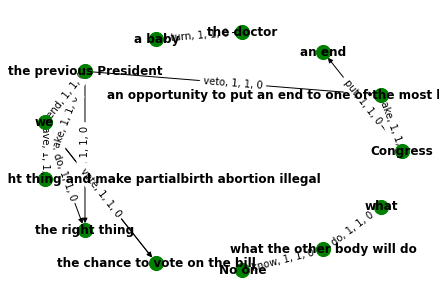

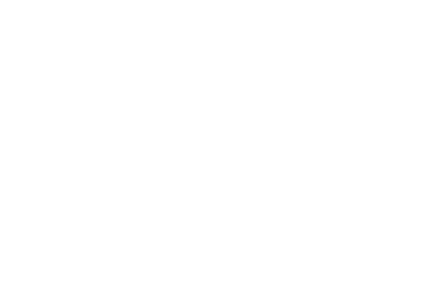

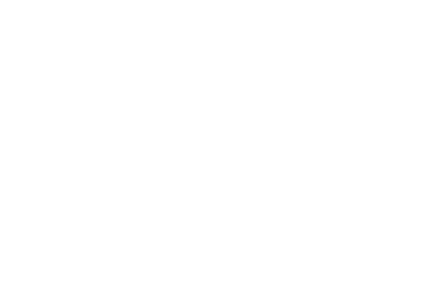

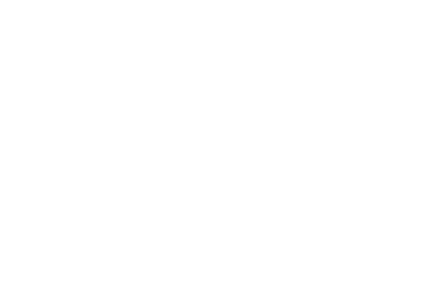

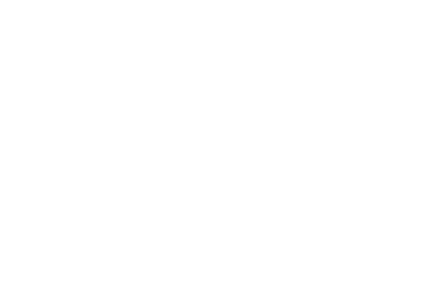

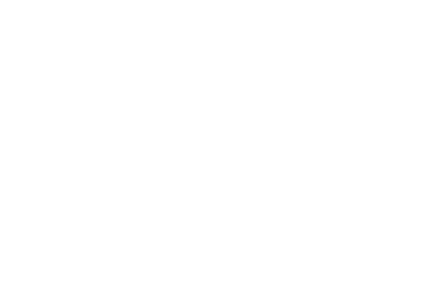

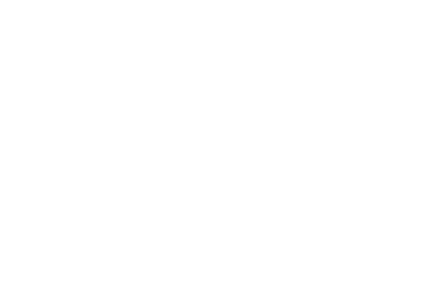

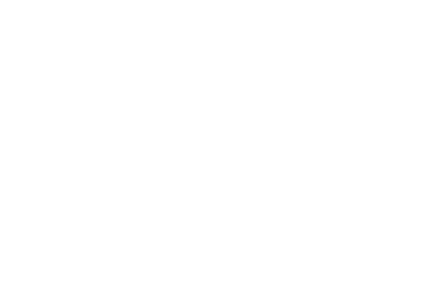

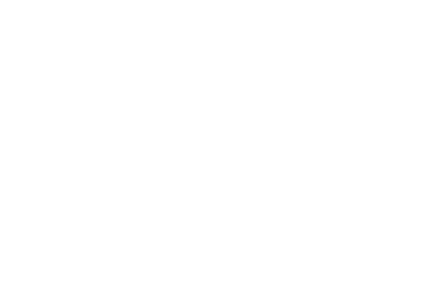

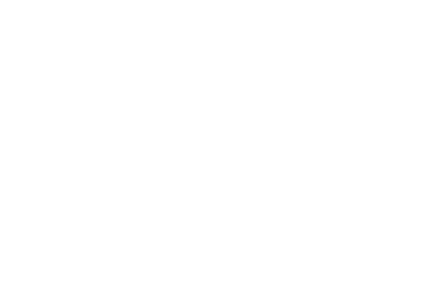

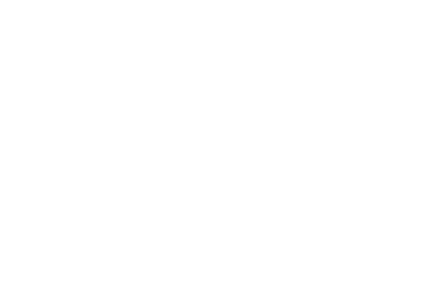

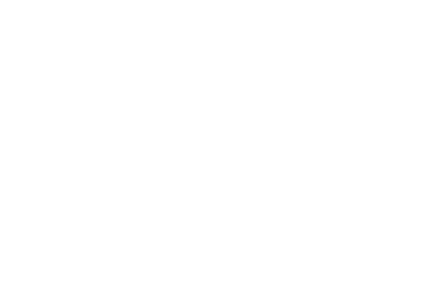

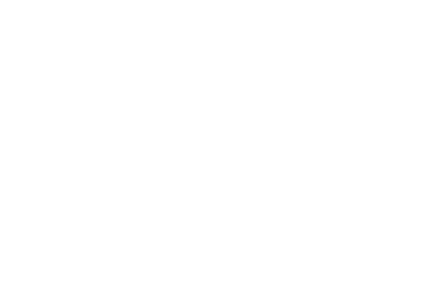

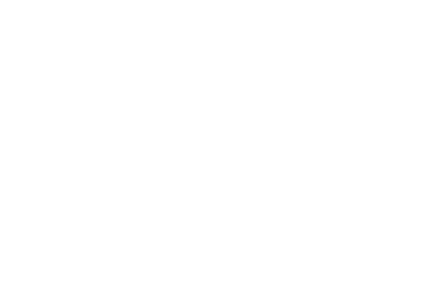

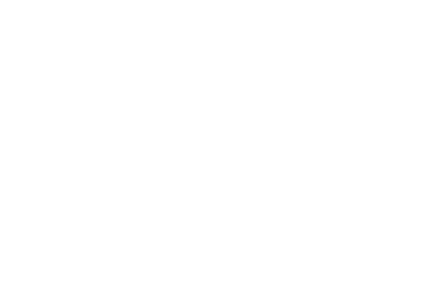

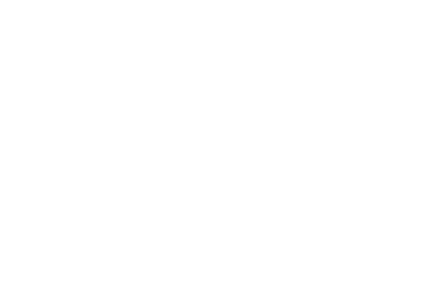

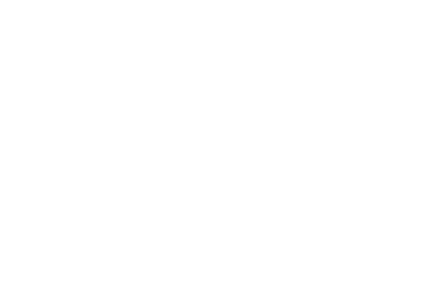

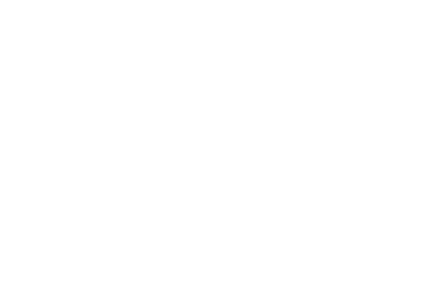

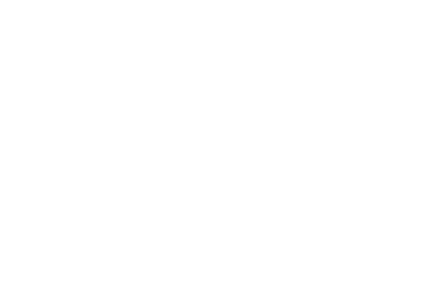

In [51]:
for knowledgeGraph in knowledgeGraphs:
  knowledgeGraphs[knowledgeGraph].draw(knowledgeGraph[:10])

In [ ]:
for i in range(len(search)):
    question = search.iloc[i].question
    print("Question: {}".format(question))
    answer_R = search.iloc[i].answer_R
    print("Republican Result: {}".format(answer_R))
    answer_D = search.iloc[i].answer_D
    print("Democrat Result: {}".format(answer_D))
    
    res_R = pd.Series({'speech': answer_R, 'party': 'R'})
    res_D = pd.Series({'speech': answer_D, 'party': 'D'})
    for res in [res_R, res_D]:
        print(res)
        triplets=Speech(res).create_triplet()
        knowledgeGraphs[question].add_edges(triplets)

        #parsed = parse_entry(question,full_result,verb_dict,verb_list)
        #graphWriterData.append(parsed)

Setup for parsing

In [ ]:
identifier=identifier
last_check=1
step_size=100
#df is still from the cell above above

def parse_entry(entry,verb_dict,verb_list):
    result=dict()
    result['question']=' '.join([token.text for token in utils.sp(entry['question'])])
    phrase_corpus, triplet_id, parsed_text,parsed=Answer(entry['answer']).create_training(verb_dict,verb_list)
    result['corpus']=' ; '.join(phrase_corpus)
    result['tags']=' '.join(['<phrase>']*len(phrase_corpus))
    result['triplet_id']=' ; '.join([re.sub('\,','',str(x))[1:-1] for x in triplet_id])
    result['parsed_text']=parsed_text
    result['parsed']=' '.join([str(x) for x in parsed])
    return result

def load_pickles(identifier, checkpoint):
  if os.path.exists("verb_dict"+identifier+str(checkpoint)+".pickle"):
    with open('verb_dict'+identifier+str(checkpoint)+'.pickle', 'rb') as handle:
      verb_dict = pickle.load(handle)
    with open('verb_list'+identifier+str(checkpoint)+'.pickle', 'rb') as handle:
      verb_list = pickle.load(handle)
    with open('result'+identifier+str(checkpoint)+'.pickle', 'rb') as handle:
      result = pickle.load(handle)
  else:
    print('File does not exist yet.')
    verb_dict=dict()
    verb_list=[]
    result=[]
  return verb_dict, verb_list, result

def dump_pickles(identifier, checkpoint, verb_dict, verb_list, result):
  with open("verb_dict"+identifier+str(checkpoint)+".pickle", 'wb') as handle:
      pickle.dump(verb_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
  with open("verb_list"+identifier+str(checkpoint)+".pickle", 'wb') as handle:
      pickle.dump(verb_list, handle, protocol=pickle.HIGHEST_PROTOCOL)
  with open("result"+identifier+str(checkpoint)+".pickle", 'wb') as handle:
      pickle.dump(result, handle, protocol=pickle.HIGHEST_PROTOCOL)
  return 

verb_dict, verb_list, result=load_pickles(identifier, last_check)

Process data

In [ ]:
for i in range(last_check+1,int(df.shape[0]/step_size)):
  print(i)
  df[step_size*(i-1):step_size*i].apply(lambda x: result.append(parse_entry(x,verb_dict,verb_list)), axis=1)
  dump_pickles(identifier,i,verb_dict,verb_list,result)
print('done with ordered')
df[step_size*i:].apply(lambda x: result.append(parse_entry(x,verb_dict,verb_list)), axis=1)
dump_pickles(identifier,1+df.shape[0]/step_size,verb_dict,verb_list,result)

Post-processing of data

In [ ]:
df=pd.DataFrame(result) 
df=df.sample(frac=1, random_state=36)
df=df.dropna(axis=0, how='any')
df=df[df.iloc[:,4].apply(lambda x: len(x)<1000)]
df=df[df.iloc[:,1].apply(lambda x: len(x)<1000)]

Write to variables

In [ ]:
identifier='../GraphWriter-master/data/preprocessed'
m=df.iloc[:50]
m.to_csv(identifier+'.control.tsv', sep='\t', index=False, header=False)
m=df.iloc[50:1050]
m.to_csv(identifier+'.val.tsv', sep='\t', index=False, header=False)
m=df.iloc[1050:2050]
m.to_csv(identifier+'.test.tsv', sep='\t', index=False, header=False)
m=df.iloc[2050:]
m.to_csv(identifier+'.train.tsv', sep='\t', index=False, header=False)

with open(identifier+'.vocab', 'w') as filehandle:
    filehandle.writelines("%s\n" % verb.upper() for verb in verb_list)

Train with GraphWriter

In [ ]:
#!python ../GraphWriter-master/train.py -save ../GraphWriter-master/partisanResponses

Use file with lowest vloss in the folder "partisanResponses" of GraphWriter-master to generate responses on test data.


E.g. in the next cell "9.vloss-3.980539.lr-0.1" was used.

In [ ]:
!python ../GraphWriter-master/generator.py -save=../GraphWriter-master/partisanResponses/9.vloss-3.980539.lr-0.1